In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

C:\Users\Nail\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib inline

### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [3]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

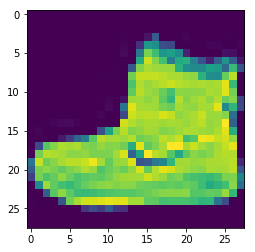

In [4]:
plt.imshow(X_train[0])

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

*Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого числа главных компонент  стоит повторять многократно на различных случайных подвыборках.*

In [5]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=True)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5728

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [82]:
%%time

num_components = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]
score_list = []
mean_score_list = []
var_score_list = []
num_iterations = 10
for num in num_components:  
    for _ in range(num_iterations):
        pca = PCA(n_components=num)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr = LogisticRegression()
        lr.fit(X_train_lowdim, y_train[used_indices])
        lr.predict(pca.transform(X_test.reshape([-1, 784])))
        score_list.append(accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784])))))
    mean_score_list.append(np.mean(score_list))
    var_score_list.append(np.var(score_list))
    score_list = []

Wall time: 23min 2s


## График зависимости функции качества  от числа главных компонент.

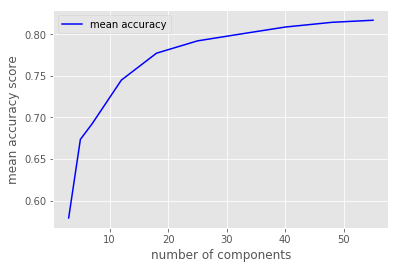

In [86]:
plt.style.use('ggplot')

plt.plot(num_components, mean_score_list, 'b', label='mean accuracy')
plt.xlabel('number of components')
plt.ylabel('mean accuracy score')
plt.legend(loc='upper left')


## График зависимости оценки дисперсии функции качества от числа главных компонент.

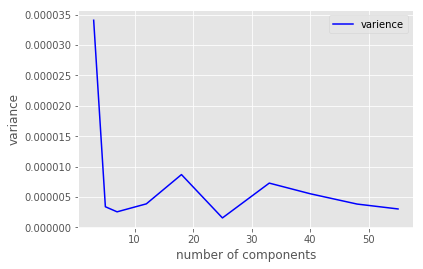

In [87]:
plt.style.use('ggplot')

plt.plot(num_components, var_score_list, 'b', label='varience')
plt.xlabel('number of components')
plt.ylabel('variance')
plt.legend(loc='upper right')
